In [1]:
#%pip install pandas
import pandas as pd
import math

Obliczenie `AVG_ID_SUM` - wynik będzie stosowany jako ziarno generatora liczb losowych.

In [2]:
AVG_ID_SUM = math.floor((308187 + 308208) / 2)
AVG_ID_SUM

308197

In [3]:
data = pd.read_csv('Advertising.csv')

Można zauważyć, że dane nie zawierają pustych pomiarów.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lp         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Wszystkie wartości wyglądają poprawnie, w kolumnie `Radio`, występuję 0 ale w przypadku tych danych, nie świadczy to o błędnych danych. Dana firma po prostu mogła nie zainwestować w reklame poprzez radio.

In [5]:
for col in data.columns:
    print(col, ' : ', data[col].unique(), '\n')

Lp  :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] 

TV  :  [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 

Ustawienie indexu dla danych `data`.

In [6]:
data.set_index('Lp', inplace=True)
data

,TV,Radio,Newspaper,Sales
Lp,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


Wszystkie dane, wyglądają dobrze, można na pierwszy rzut oka zauważyć, że głównie firmy inwestują w reklamę przez `Tv`, druga jest `Newspaper`, a najmniej inwestuje się w `Radio`.

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Macierz korelacji:
- `Sales` z `Tv` to aż 0.78, zatem inwestycja w reklame TV musi przynosić korzyści, skoro wraz ze wzrostem inwestycji w Tv rośnie sprzedaż.
- `Sales` z `Radio` 0.58, inwestycja w radio również się opłaca.
- `Sales` z `Newpaper` 0.23 dzięki reklamie w gazecie sprzedaż również rośnie, lecz najmniej przyczynia się do wzrostu sprzedaży.

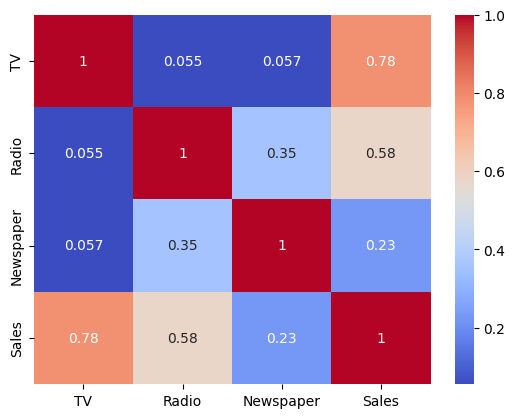

In [8]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Przygotowanie predyktorów i zmiennej celu, predyktory są dość mocno powiązane ze zmienną celu, zatem żadne kolumna nie zostanie usunięta.</br>
Dodatkowo robimy kopię danych, aby później wykorzystać je w drugim modelu


In [9]:
data2 = data

X = data.drop(columns=['Sales'])
y = data['Sales']

Podział na zbiór uczący i testowy w stosunku 0.7 : 0.3

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=AVG_ID_SUM)

Normalizacja danych, do przedziału <-1; 1>.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

col = ['TV', 'Radio', 'Newspaper']

preprocesor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), col),
    ]
)

Przy użyciu `Pipeline` tworzona jest "lista kroków" jaka ma się wykonać, w tym przypadku, najpierw z wyżej utworzonego preprocesora przekształcane są dane, a nastepnie przy użyciu `MLPRegressor` tworzy się klasyfikator oparty na regresywnej sieci neuronowej.

Parametr `max_iter=300`, został dostosowany ze względu na mały zbiór oraz "nieprzeuczającą" się sieć. <br>
Parametr `learning_rate='adaptive'` został dobrany, ze względu na dynamiczne dostosowywanie współcznika uczenia, co we współpracy, ze zwiększoną `max_iter`, znajduje równowagę między najeefektywniejszym nauczeniem sieci, tak by jej nie przeuczyć.<br>

Co ciekawe, zwiększanie parametru max_iter korzystnie wpływa na wyniki sieci, jednak z powodu małego zbioru może to być spowodowane przeuczaniem się sieci. Z powodu małego zbioru, nie ma różnorodności danych, zatem gdy model otrzyma kompletnie inne wartości danych, może znacząco się pomylić.<br>
Przykład: parametr `max_iter=5000` daje następujące wyniki:

Zbiór uczący<br>
Średni błąd bezwzględny (MAE) 0.425<br>
Błąd średniokwadratowy (MSE) 0.402<br>
Pierwiastek błędu średniokwadratowego (RMSE) 0.634<br>
Średni bezwzględny błąd procentowy (MAPE) 5.664 %<br>

Zbiór testowy<br>
Średni błąd bezwzględny (MAE) 0.47<br>
Błąd średniokwadratowy (MSE) 0.459<br>
Pierwiastek błędu średniokwadratowego (RMSE) 0.677<br>
Średni bezwzględny błąd procentowy (MAPE) 5.023 %<br>

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=AVG_ID_SUM, max_iter=300, learning_rate='adaptive')

potok = Pipeline(
    steps=[
        ('prep', preprocesor),
        ('siec', mlp_regressor)
    ]
)
potok

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['TV', 'Radio',
                                                   'Newspaper'])])),
                ('siec',
                 MLPRegressor(learning_rate='adaptive', max_iter=300,
                              random_state=308197))])

To polecenie, najpierw przekształca zbiór uczący, a nastepnie odbywa się "uczenie" regresywnej sieci neuronowej.

In [13]:
potok.fit(X_train, y_train)

c:\Users\dsobi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['TV', 'Radio',
                                                   'Newspaper'])])),
                ('siec',
                 MLPRegressor(learning_rate='adaptive', max_iter=300,
                              random_state=308197))])

Funkcja oceniająca regresyjny.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt
def evaluate_regression_model(y_true, y_pred, digits = 3):
    print('Średni błąd bezwzględny (MAE)', round(mean_absolute_error(y_true, y_pred),digits))
    print('Błąd średniokwadratowy (MSE)', round(mean_squared_error(y_true, y_pred),digits))
    print('Pierwiastek błędu średniokwadratowego (RMSE)', round(sqrt(mean_squared_error(y_true, y_pred)), digits))
    print('Średni bezwzględny błąd procentowy (MAPE)', round(100*mean_absolute_percentage_error(y_true, y_pred), digits),'%')

Jak na skomplikowany problem jakim jest inwestycja w reklame w stosunku do poźniejszej sprzedaży jak i małej ilości danych, model zachowuje się dość dobrze. Problem jest skomplikowany, ponieważ na sprzedaż nie wpływa tylko kwota zainwestowana w reklame, ale również pijar danej firmy, ogólne postrzeganie jak i produkt jaki jest sprzedawany. Model testowy wykazuje lepsze zachowanie, jest to najprawdopodobniej spowodowane wspomnianą małą ilością danych -> małą różnorodnością i dane ze zbioru uczącego mogą odpowiadać być bardzo podobne do danych ze zbioru testowego.

In [15]:
y_reg_train_pred = potok.predict(X_train)
y_reg_test_pred = potok.predict(X_test)
print('Zbiór uczący')
evaluate_regression_model(y_train, y_reg_train_pred)
print()
print('Zbiór testowy')
evaluate_regression_model(y_test, y_reg_test_pred)

Zbiór uczący
Średni błąd bezwzględny (MAE) 2.676
Błąd średniokwadratowy (MSE) 12.328
Pierwiastek błędu średniokwadratowego (RMSE) 3.511
Średni bezwzględny błąd procentowy (MAPE) 23.351 %

Zbiór testowy
Średni błąd bezwzględny (MAE) 2.312
Błąd średniokwadratowy (MSE) 9.36
Pierwiastek błędu średniokwadratowego (RMSE) 3.059
Średni bezwzględny błąd procentowy (MAPE) 17.628 %


Funkcja służąca wyświetleniu informacji o sieci neuronowej.

In [16]:
def network_information(potok, krok):
    print('Liczba warstw: ', potok.named_steps[krok].n_layers_)
    print('Liczba neuronów w warstwie wejściowej: ', potok.named_steps[krok].n_features_in_)
    print('Liczba neuronów w warstwach ukrytych: ', potok.named_steps[krok].hidden_layer_sizes)
    print('Funkcja aktywacji w warstwach ukrytych : ', potok.named_steps[krok].activation)
    print('Liczba neuronów w warstwie wyjściowej: ', potok.named_steps[krok].n_outputs_)
    print('Funkcja aktywacji w warstwie wyjściowej : ', potok.named_steps[krok].out_activation_)

Opis sieci:
1. Sieć składa się z 3 wartstw, warstwy wejściowej, jednej ukrytej i wyjściowej.
2. Liczba neuronów w warstwie wejściowej wynosi 3, ponieważ na wejściu otrzymuje trzy wartości: `TV`, `Radio` i `Newspaper`.
3. Domyślną liczbę neuronów w wartstwie ukrytej.
4. Jest to funkcja aktywacji, która aktywuje neuron.
5. Sieć ma jedną jednostkę w warstwie wyjściowej, jakim jest przewidywany wynik.
6. Jest to funkcja tożsamościowa, która nie zmienia swojego wejścia, f(x) = x. Oznacza to, że wyjście z neuronu jest równoważne jego wejściu.

In [17]:
network_information(potok, 'siec')

Liczba warstw:  3
Liczba neuronów w warstwie wejściowej:  3
Liczba neuronów w warstwach ukrytych:  (100,)
Funkcja aktywacji w warstwach ukrytych :  relu
Liczba neuronów w warstwie wyjściowej:  1
Funkcja aktywacji w warstwie wyjściowej :  identity


Przykładowy segment do testowania modelu na własnych danych. Zerowy index w liście odpowiada predyktorowi `Tv`, pierwszy `Radio` a drugi `Newspaper`. Jako, że w sieci neuronowej cięzko określić ważność poszczególnych zmiennych, wykonano kilka testów manualnych. Przykład: [10, 0, 0], [0, 10, 0], [0, 0, 10]. W tym teście największą przewidywaną wartość model przewidział dla: [0, 10, 0], czyli dla predyktora `Radio`. Jest to jednak spowodowane tym, że model uczył się na danych gdzie najwięcej inwestowano w `TV` średnia ~ 147, a `Radio` średnia ~ 23. Jednak według macierzy korelacji na wynik sprzedaży najbardziej przyczynia się inwestycja w `Tv`.

In [18]:
# example_row = [11, 59, 6]
# df_row = pd.DataFrame([example_row], columns=col)

# predicted_value = potok.predict(df_row)
# print("Predicted value:", predicted_value[0])

Wykres pokazujący przewidywaną wartość do prawdziwej. Oś y = 0 oznacza, że wartość przewidywana jest taka sama jak prawdziwa (różnica tych wartości). Jeżeli marker znajduje się poniżej osi y = 0, znaczy to że przewidziana wartość jest mniejsza od prawdziwej o wartość f(x), gdzie x + 1 to index próbki w liście - nie jest to równoważne z indexem danych jakim jest `LP`. Analogicznie, jeżeli marker znajduje się powyżej osi y, znaczy to że przewidywana wartość jest większa od prawdziwej wartości o wartość f(x).

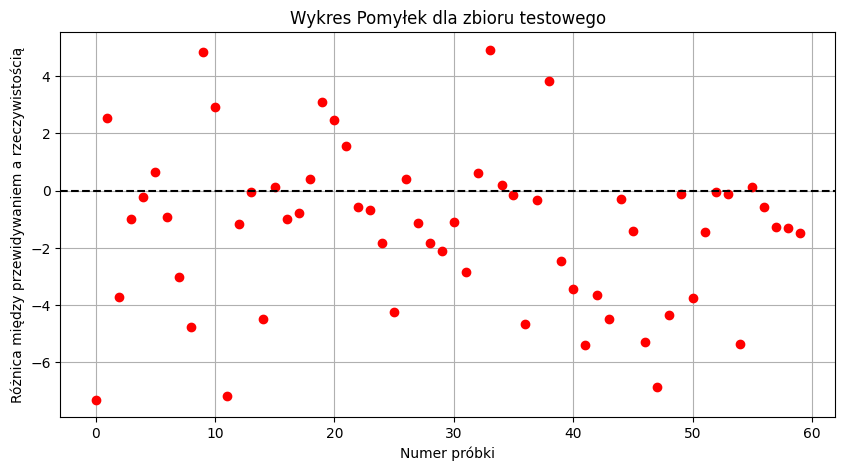

In [19]:
import matplotlib.pyplot as plt

differences = [p - r for p, r in zip(y_reg_test_pred, y_test)]

plt.figure(figsize=(10, 5))
plt.plot(differences, 'o', color='r')
plt.title('Wykres Pomyłek dla zbioru testowego')
plt.xlabel('Numer próbki')
plt.ylabel('Różnica między przewidywaniem a rzeczywistością')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

Jak można zauważyć model zwraca zaniżone przewidywane wyniki w stosunku do prawdziwych, tzn. model zwraca niższe wartości niż prawdziwe.

In [20]:
sum(differences) / len(y_reg_test_pred)

-1.3536178999386657

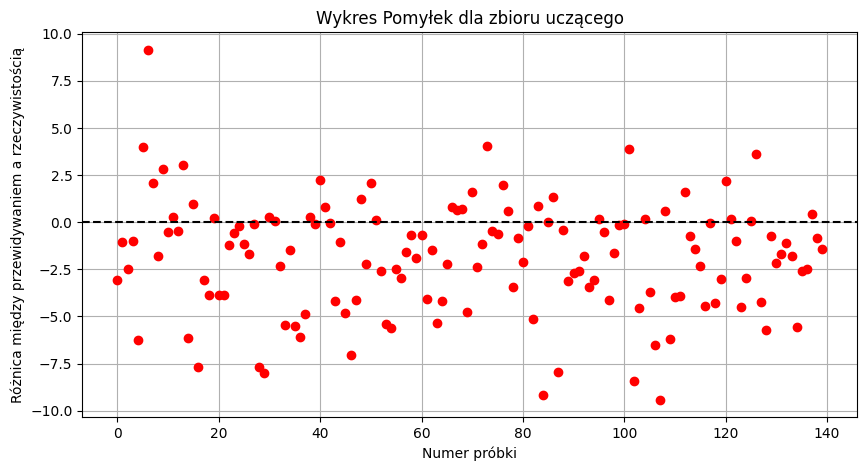

In [21]:
import matplotlib.pyplot as plt

differences = [p - r for p, r in zip(y_reg_train_pred, y_train)]

plt.figure(figsize=(10, 5))
plt.plot(differences, 'o', color='r')
plt.title('Wykres Pomyłek dla zbioru uczącego')
plt.xlabel('Numer próbki')
plt.ylabel('Różnica między przewidywaniem a rzeczywistością')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

Dla zbioru uczącego, wyniki przewidywane są również zaniżone, można nawet to zaobserwować po samym wykresie.

In [22]:
sum(differences) / len(y_reg_train_pred)

-1.8898839246487296

<h1>Model 2 - Lasy losowe</h1>

Drugi model to będzie model lasów losowych
Dane zostały skopiowane w jednym z poprzednich kroków i wyglądają następująco

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Podzielmy dane na uczące i testowe

In [26]:
X = data2.drop(columns=['Sales'])
y = data2['Sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=AVG_ID_SUM)


Upewnijmy się, że zostały one prawidłowo podzielone.

In [28]:
len(X_train)/(len(X_train)+len(X_test)), len(X_test)/(len(X_train)+len(X_test))

(0.7, 0.3)

Stworzenie Lasu za pomocą funkcji sklearn.
Używamy unikalnej liczby powstałej z indeksów.

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg1 = RandomForestRegressor(random_state=AVG_ID_SUM, n_jobs = -1)
forest_reg1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=308197)

In [31]:
y_train_pred = forest_reg1.predict(X_train)
y_test_pred = forest_reg1.predict(X_test)

Stworzenie funkcji do oceny modelu regresji:

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from math import sqrt
def ocen_model_regresji(y_true, y_pred, digits = 3):
    print('Średni błąd bezwzględny', round(mean_absolute_error(y_true, y_pred),digits))
    print('Błąd średniokwadratowy', round(mean_squared_error(y_true, y_pred),digits))
    print('Pierwiastek błędu średniokwadratowego',round(sqrt(mean_squared_error(y_true, y_pred)), digits))
    print('Średni bezwzględny błąd procentowy',round(100*mean_absolute_percentage_error(y_true, y_pred), digits),'%')

In [33]:
print('Zbiór uczący')
ocen_model_regresji(y_train, y_train_pred)
print('\n')
print('Zbiór testowy')
ocen_model_regresji(y_test, y_test_pred)

Zbiór uczący
Średni błąd bezwzględny 0.24
Błąd średniokwadratowy 0.117
Pierwiastek błędu średniokwadratowego 0.342
Średni bezwzględny błąd procentowy 2.756 %


Zbiór testowy
Średni błąd bezwzględny 0.603
Błąd średniokwadratowy 0.607
Pierwiastek błędu średniokwadratowego 0.779
Średni bezwzględny błąd procentowy 5.031 %


Jak możemy zauważyć wyżej, las został przeuczony, ponieważ jest duże odstępstwo pomiędzy zbiorami danych.
Ustalmy więc maksymalną głębokość drzewa.
Zbudujmy model z nowo ustalonymi zmiennymi:

In [34]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'max_depth' : range(1,10), 'min_samples_split' : [10, 20,50]}
best_forest_reg = GridSearchCV(RandomForestRegressor(random_state = AVG_ID_SUM,max_features = 1.0), hyperparameters, n_jobs = -1)
best_forest_reg.fit(X_train, y_train)
best_forest_reg.best_params_

{'max_depth': 7, 'min_samples_split': 10}

In [35]:
y_train_pred = best_forest_reg.predict(X_train)
y_test_pred = best_forest_reg.predict(X_test)
print('Zbiór uczący')
ocen_model_regresji(y_train, y_train_pred)
print('\n')
print('Zbiór testowy')
ocen_model_regresji(y_test, y_test_pred)

Zbiór uczący
Średni błąd bezwzględny 0.501
Błąd średniokwadratowy 0.475
Pierwiastek błędu średniokwadratowego 0.689
Średni bezwzględny błąd procentowy 5.416 %


Zbiór testowy
Średni błąd bezwzględny 0.828
Błąd średniokwadratowy 1.134
Pierwiastek błędu średniokwadratowego 1.065
Średni bezwzględny błąd procentowy 6.948 %


Jak widać dane są do siebie o wiele bardziej zbliżone, co sugeruje, że zostały one dobrze dobrane.
Sprawdzmy ważność predyktorów, jak widać kolumna TV miała największe znaczenie.

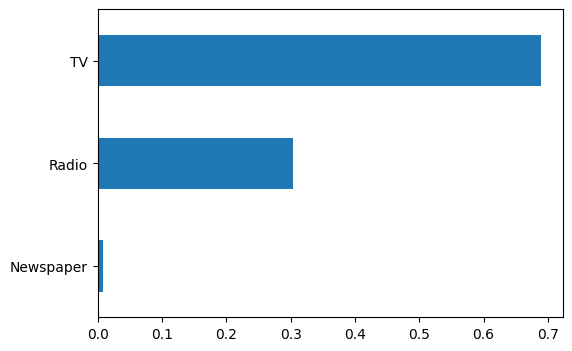

In [37]:
def waznosc_predyktorow(drzewo):
    waznosci = pd.Series(drzewo.feature_importances_, index=X_train.columns)
    waznosci.sort_values(inplace=True)
    waznosci.iloc[-10:].plot(kind='barh', figsize=(6,4))
waznosc_predyktorow(best_forest_reg.best_estimator_)

Sprawdzmy wykresy pomyłek.
Zarówno na zbiorze uczącym jak i testowym, model trochę zaniżył nam wyniki, lecz nie na tyle, aby się tym martwić.

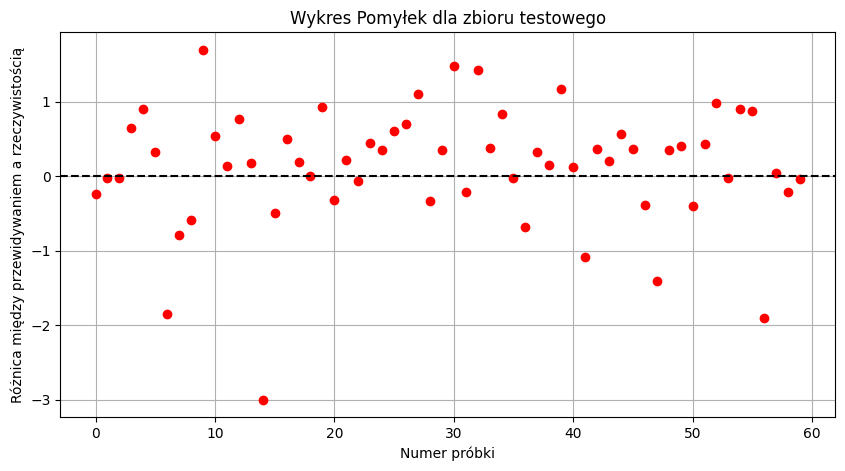

In [43]:
import matplotlib.pyplot as plt

differences = [p - r for p, r in zip(y_test_pred, y_test)]

plt.figure(figsize=(10, 5))
plt.plot(differences, 'o', color='r')
plt.title('Wykres Pomyłek dla zbioru testowego')
plt.xlabel('Numer próbki')
plt.ylabel('Różnica między przewidywaniem a rzeczywistością')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

Jak można zauważyć model zwraca zaniżone przewidywane wyniki w stosunku do prawdziwych, tzn. model zwraca niższe wartości niż prawdziwe.

In [46]:
sum(differences) / len(y_test_pred)

-1.6727360237685692e-15

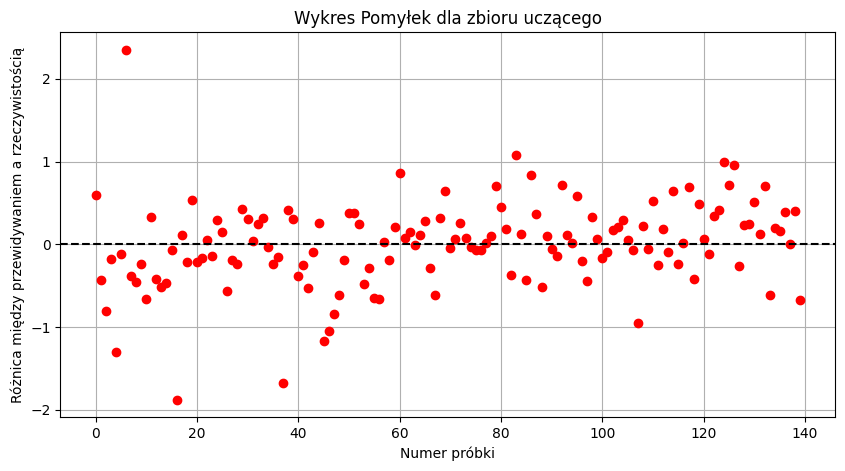

In [44]:
import matplotlib.pyplot as plt

differences = [p - r for p, r in zip(y_train_pred, y_train)]

plt.figure(figsize=(10, 5))
plt.plot(differences, 'o', color='r')
plt.title('Wykres Pomyłek dla zbioru uczącego')
plt.xlabel('Numer próbki')
plt.ylabel('Różnica między przewidywaniem a rzeczywistością')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

Jak można zauważyć model zwraca zaniżone przewidywane wyniki w stosunku do prawdziwych, tzn. model zwraca niższe wartości niż prawdziwe.

In [45]:
sum(differences) / len(y_train_pred)

-7.168868673293868e-16